In [188]:
import json
import statistics
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt

import pyopenms as pms

BASE_DIR = Path().resolve().parent
MZML_DIR = BASE_DIR / "data" / "mzml"
TSV_DIR = BASE_DIR / "data" / "tsv"
FIG_OUT_DIR = BASE_DIR / "presentation" / "figures"
FIG_DATA_DIR = BASE_DIR / "presentation" / "data"



In [39]:
def open_json(filepath):
    with open(filepath, "r") as f:
        data = json.load(f)
    return data


sig_peak_json = FIG_DATA_DIR / "20220201_perc_peaks_identified_1330_0.json"
data = open_json(sig_peak_json)

exp_rt, exp_id, mz_perc, mz_rt_perc, mz_rt_im_perc = zip(*[d.values() for d in data])
data[0]


{'rt': 2400.240718,
 'exp_id': 'frame=22786_scan=452',
 'mz_perc_identified': 0.7641719472512416,
 'mz_perc_rt_identified': 0.2586915567734201,
 'mz_perc_rt_im_identified': 0.11979791060113033}

In [165]:
exp_rt[mz_perc.index(max(mz_perc))]


2688.630046

In [41]:
def plot_2_lines(
    x_axis, first, second, x_axis_label, y_axis_label, first_label, second_label, title
):
    fig = plt.figure()
    plt.plot(x_axis, first, label=first_label)
    plt.plot(x_axis, second, label=second_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    return fig


def plot_3_lines(
    first_x_axis,
    first,
    second_x_axis,
    second,
    third_x_axis,
    third,
    x_axis_label,
    y_axis_label,
    first_label,
    second_label,
    third_label,
    title,
):
    fig = plt.figure()
    plt.plot(first_x_axis, first, label=first_label)
    plt.plot(second_x_axis, second, label=second_label)
    plt.plot(third_x_axis, third, label=third_label)

    plt.title(title)
    plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    return fig


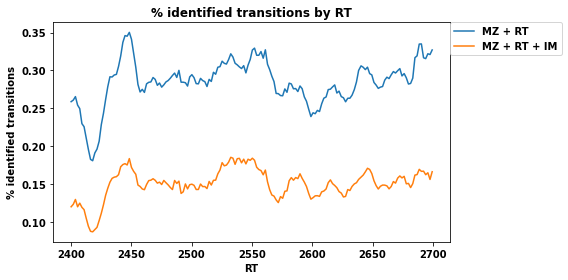

In [142]:
fig = plot_2_lines(
    exp_rt,
    mz_rt_perc,
    mz_rt_im_perc,
    "RT",
    "% identified transitions",
    "MZ + RT",
    "MZ + RT + IM",
    "% identified transitions by RT",
)

fig.set_size_inches(8, 4)
fig.tight_layout()
# Change values here..
plt.savefig(FIG_OUT_DIR / "20220201_Total_RT_2_way_lineplot.png", dpi=100)
plt.show()


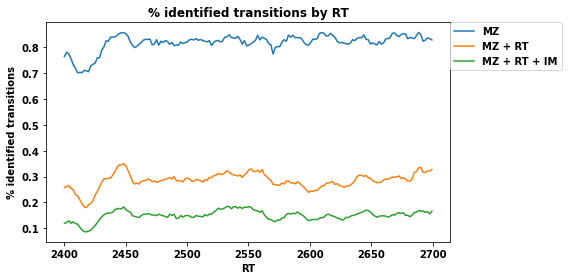

In [143]:
fig = plot_3_lines(
    exp_rt,
    mz_perc,
    exp_rt,
    mz_rt_perc,
    exp_rt,
    mz_rt_im_perc,
    "RT",
    "% identified transitions",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% identified transitions by RT",
)

fig.set_size_inches(8, 4)
fig.tight_layout()
# Change values here..
plt.savefig(FIG_OUT_DIR / "20220201_Total_RT_3_way_lineplot.png", dpi=100)
plt.show()


In [191]:
statistics.mean(mz_perc), statistics.mean(mz_rt_perc), statistics.mean(mz_rt_im_perc)

(0.8177564353628025, 0.28488267613412543, 0.15036406182187467)

### Look at intensities between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [149]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    found_int_10_150 = list(map(float, data["found_intensity_perc_range_10_150"]))
    nonfound_int_10_150 = list(map(float, data["nonfound_intensity_perc_range_10_150"]))
    return found_int_10_150, nonfound_int_10_150


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_int_10_150(filename):
    found_unfound_intensity_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_intensity_json)
    rt_window = list(map(float, data["intensity_window_range_10_150"]))
    perc_found_in_rt_window = list(map(float, data["perc_found_intensity_range_10_150"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_int_10_150, nonfound_int_10_150 = get_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_intensity_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_intensity_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_int_10_150(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity_window.json"
)


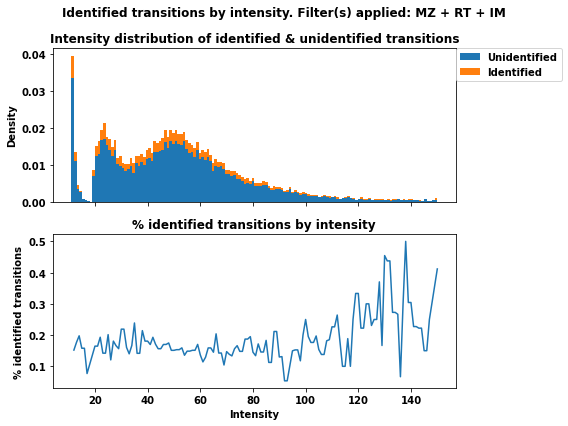

In [150]:
# FOR PLOTTING INTENSITIES

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified transitions by intensity. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_int_10_150, found_int_10_150],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=138,
)
ax1.set_title("Intensity distribution of identified & unidentified transitions")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window, label="Found")
ax2.set_title("% identified transitions by intensity")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="Intensity", ylabel="% identified transitions")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_intensity.png", dpi=100
)
plt.show()


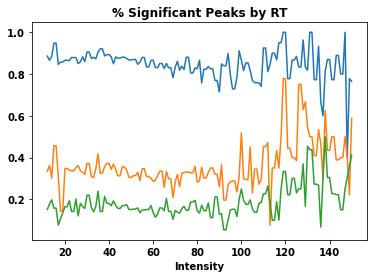

In [44]:
plt.plot(rt_mz_window, perc_found_in_rt_mz_window)
plt.plot(rt_mz_rt_window, perc_found_in_rt_mz_rt_window)
plt.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window)
plt.title("% Significant Peaks by RT")
plt.xlabel("Intensity")
plt.show()


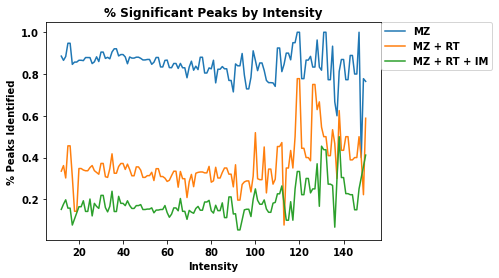

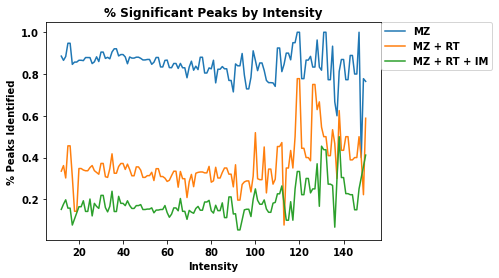

In [45]:
plot_3_lines(
    rt_mz_window,
    perc_found_in_rt_mz_window,
    rt_mz_rt_window,
    perc_found_in_rt_mz_rt_window,
    rt_mz_rt_im_window,
    perc_found_in_rt_mz_rt_im_window,
    "Intensity",
    "% Peaks Identified",
    "MZ",
    "MZ + RT",
    "MZ + RT + IM",
    "% Significant Peaks by Intensity",
)


### Look at ion mobility between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [156]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_im(filename):
    found_unfound_im_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_im_json)
    found_im = list(map(float, data["found_ion_mobility_perc"]))
    nonfound_im = list(map(float, data["nonfound_ion_mobility_perc"]))
    return found_im, nonfound_im


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_im(filename):
    found_unfound_im_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_im_json)
    rt_window = list(map(float, data["ion_mobility_window"]))
    perc_found_in_rt_window = list(map(float, data["perc_nonfound_ion_mobility_window"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_im, nonfound_im = get_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_ion_mobility_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_ion_mobility_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_im(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility_window.json"
)


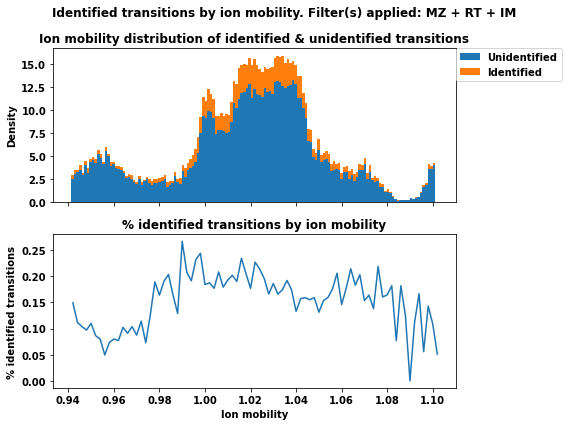

In [157]:
# FOR PLOTTING ION MOBILITY

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified transitions by ion mobility. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_im, found_im],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=142,
)
ax1.set_title("Ion mobility distribution of identified & unidentified transitions")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window[1:], perc_found_in_rt_mz_rt_im_window[1:], label="Found")
ax2.set_title("% identified transitions by ion mobility")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="Ion mobility", ylabel="% identified transitions")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_ion_mobility.png", dpi=100
)
plt.show()


### Look at mass to charge between sig and non-sig peaks

Isolate most - mid - and least peak found data and plot -- if not, take min max

In [162]:
# Load intensity data from found and non-found peaks
def get_found_and_nonfound_mz(filename):
    found_unfound_mz_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_mz_json)
    found_im = list(map(float, data["found_mass_to_charge_perc"]))
    nonfound_im = list(map(float, data["nonfound_mass_to_charge_perc"]))
    return found_im, nonfound_im


# Load intensity window data from found and non-found peaks
def get_window_found_and_nonfound_mz(filename):
    found_unfound_mz_json = FIG_DATA_DIR / filename
    data = open_json(found_unfound_mz_json)
    rt_window = list(map(float, data["mass_to_charge_window"]))
    perc_found_in_rt_window = list(map(float, data["perc_nonfound_mass_to_charge_window"]))
    return rt_window, perc_found_in_rt_window


# Change values here..
found_mz, nonfound_mz = get_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge.json"
)
rt_mz_window, perc_found_in_rt_mz_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_mass_to_charge_window.json"
)
rt_mz_rt_window, perc_found_in_rt_mz_rt_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_mass_to_charge_window.json"
)
rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window = get_window_found_and_nonfound_mz(
    "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge_window.json"
)


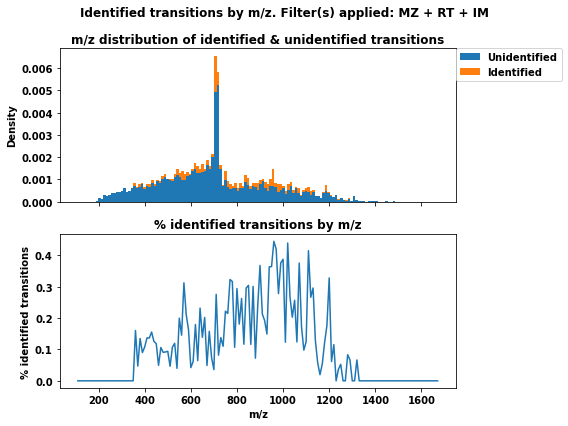

In [163]:
# FOR PLOTTING ION MOBILITY

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)
# Change values here..
fig.suptitle("Identified transitions by m/z. Filter(s) applied: MZ + RT + IM")

ax1.hist(
    [nonfound_mz, found_mz],
    label=["Unidentified", "Identified"],
    stacked=True,
    density=True,
    bins=142,
)
ax1.set_title("m/z distribution of identified & unidentified transitions")
ax1.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
ax1.set(ylabel="Density")

# Change values here..
ax2.plot(rt_mz_rt_im_window, perc_found_in_rt_mz_rt_im_window, label="Found")
ax2.set_title("% identified transitions by m/z")
# ax2.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
ax2.set(xlabel="m/z", ylabel="% identified transitions")

fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220201_RT_2688.630046_frame=25523_scan=452_MZ_RT_IM_mass_to_charge.png",
    dpi=100,
)
plt.show()


## Plot raw MS2 peaks

In [75]:
import matplotlib.pyplot as plt


def plot_spectrum(spectrum):
    # plot every peak in spectrum and annotate with it's m/z
    for mz, i in zip(*spectrum.get_peaks()):
        plt.plot([mz, mz], [0, i], color="black")
        # plt.text(mz, i, str(mz))

    # for the title add RT and Precursor m/z if available
    title = ""
    if spectrum.getRT() >= 0:
        title += "RT: " + str(spectrum.getRT())
    if len(spectrum.getPrecursors()) >= 1:
        title += "   Precursor m/z: " + str(spectrum.getPrecursors()[0].getMZ())

    plt.title(title)
    plt.ylabel("intensity")
    plt.xlabel("m/z")
    plt.ylim(bottom=0)

    plt.show()


In [78]:
# Get MZML experiment object

mzml_filepath = (
    MZML_DIR
    / "Rost_DIApy3_SP2um_90min_250ngK562_100nL_1_Slot1-5_1_1330_6-28-2021_0_2400_to_2700_swath_700.mzML"
)


def get_msexperiment_obj(mzml_filepath):
    # Read corresponding mzML file and load it into pyopenms object
    msexperiment = pms.MSExperiment()
    pms.MzMLFile().load(str(mzml_filepath), msexperiment)
    return msexperiment


exps = get_msexperiment_obj(mzml_filepath)


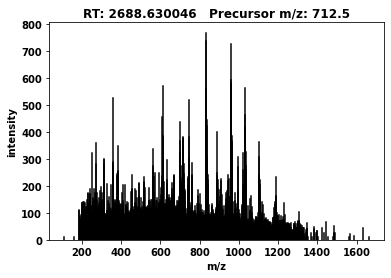

In [81]:
for exp in exps:
    if exp.getNativeID() == 'frame=25523_scan=452':
        break
        
plot_spectrum(exp)

In [84]:
mz, _ = exp.get_peaks()

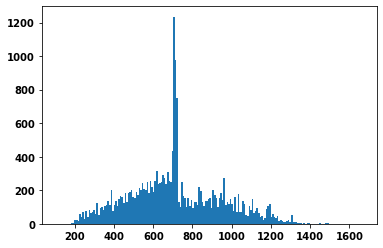

frame=25523_scan=452


In [125]:
plt.hist(list(map(round, mz)), bins=194)
plt.show()


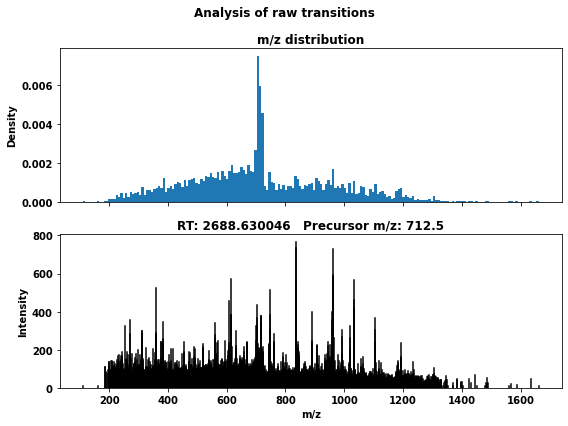

In [164]:
# FOR PLOTTING M/Z DISTRIBUTION AND RAW M/Z TO INTENSITY
for exp in exps:
    if exp.getNativeID() == 'frame=25523_scan=452':
        break
mz, _ = exp.get_peaks()


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.set_size_inches(8, 6)

fig.suptitle("Analysis of raw transitions")

ax1.hist(
    list(map(round, mz)), bins=194,
    density=True
)
ax1.set_title("m/z distribution")
ax1.set(ylabel="Density")

# plot every peak in exp and annotate with it's m/z
for mz_, i in zip(*exp.get_peaks()):
    ax2.plot([mz_, mz_], [0, i], color="black")
    # plt.text(mz, i, str(mz))

# for the title add RT and Precursor m/z if available
title = ""
if exp.getRT() >= 0:
    title += "RT: " + str(exp.getRT())
if len(exp.getPrecursors()) >= 1:
    title += "   Precursor m/z: " + str(exp.getPrecursors()[0].getMZ())

ax2.set_title(title)
ax2.set(xlabel='m/z', ylabel="Intensity")
ax2.set_ylim(bottom=0)


fig.tight_layout()
# Change values here..
plt.savefig(
    FIG_OUT_DIR / "20220202_RT_2688.630046_frame=25523_scan=452_mass_to_charge_with_intensity_comparison.png",
    dpi=100,
)
plt.show()

## Looking @ aggregated data

In [170]:
filepath = TSV_DIR / "20220201_frame=25523_scan=452_agg_data_qval_01.tsv"
agg_data = pd.read_csv(filepath, sep="\t")


In [171]:
from ast import literal_eval


def f(x):
    try:
        return literal_eval(x)
    except:
        return x


agg_data["TRANSITION_ID_UNIQUE"] = agg_data["TRANSITION_ID_UNIQUE"].apply(f)
print(len(set(agg_data["FEATURE_ID"])))
print(len(set(agg_data.explode("TRANSITION_ID_UNIQUE")["FEATURE_ID"])))
exploded = agg_data.explode("TRANSITION_ID_UNIQUE", ignore_index=True)


100865
100865


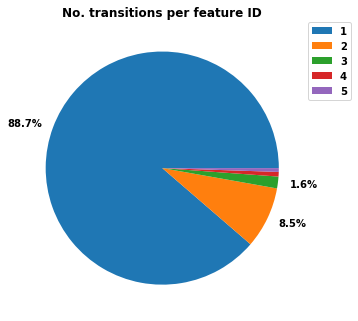

In [181]:
# HOW MANY FEATURES ARE BOUND TO A TRANSITION? MAJORITY ARE ONE

from collections import Counter

transition_counts_map = dict(Counter(list(exploded["TRANSITION_ID_UNIQUE"])))
transition_counts = list(transition_counts_map.values())
# Sort by key
transition_counts_counter = dict(
    sorted(dict(Counter(transition_counts)).items(), key=lambda item: item[0])
)
labels = list(transition_counts_counter.keys())
counts = list(transition_counts_counter.values())
perc_1 = f"{round(transition_counts_counter[1] / len(transition_counts) * 100, 1)}%"
perc_2 = f"{round(transition_counts_counter[2] / len(transition_counts) * 100, 1)}%"
perc_3 = f"{round(transition_counts_counter[3] / len(transition_counts) * 100, 1)}%"

fig = plt.figure()
fig.set_size_inches(5, 5)
plt.pie(counts, labels=[perc_1, perc_2, perc_3, "", ""])
plt.title("No. transitions per feature ID")
plt.legend(labels=labels, bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
fig.tight_layout()
plt.savefig(
    FIG_OUT_DIR / "20220202_RT_2688.630046_frame=25523_scan=452_TransitionID_to_FeatureID_ratio.png",
    dpi=100,
)
plt.show()


In [173]:
print(list(agg_data))
agg_data.head(5)

['FEATURE_ID', 'EXP_IM', 'EXP_RT', 'IM', 'INTENSITY', 'MZ', 'NORM_RT', 'QVALUE', 'TRANSITION_ID', 'TRANSITION_ID_UNIQUE', 'TRANSITION_ID_COUNT', 'IM_FLAT', 'IM_COUNT', 'MZ_COUNT', 'INTENSITY_FLAT', 'INTENSITY_COUNT']


,FEATURE_ID,EXP_IM,EXP_RT,IM,INTENSITY,MZ,NORM_RT,QVALUE,TRANSITION_ID,TRANSITION_ID_UNIQUE,TRANSITION_ID_COUNT,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT
0,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...","[389910, 389911, 389913, 389917, 389918, 389919]",96,"[0.9912804, 0.9924145, 0.99581647, 0.99695045,...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
1,376978107218137109,1.127930,5528.24,"[0.9810717, 1.0332149, 1.0366126, 1.0626494, 1...","[11.000445, 29.998693, 43.99949, 52.998085, 9....","[525.320965583993, 573.2508532068924, 573.2545...",87.413291,0.000002,"[(728100, 728101, 728102, 728103, 728104, 7281...","[728100, 728101, 728102, 728103, 728104, 728105]",72,"[0.9810717, 0.9901462, 0.9924145, 1.0048869, 1...",15,12,"[11.000445, 29.998693, 43.99949, 52.998085, 9....",15
2,377226684764097868,1.126054,4545.65,"[1.0388775, 0.9629148, (0.9719946, 1.0717007),...","[43.99949, 82.99876, (82.99876, 52.998085), 26...","[669.3583382756314, 698.2788696469254, 698.291...",71.278159,0.000002,"[(727308, 727309, 727310, 727311, 727312, 7273...","[727308, 727309, 727310, 727311, 727312, 727313]",72,"[0.9629148, 0.9719946, 0.99468255, 1.0014857, ...",14,12,"[43.99949, 82.99876, 82.99876, 52.998085, 26.0...",14
3,377314824104589559,1.039827,5996.62,"[1.0456713, (0.9538325, 1.0218867), (1.0252856...","[37.00188, (59.00292, 47.99988), (9.999508, 25...","[417.2052623725024, 713.4385661432365, 713.442...",95.189019,0.000002,"[(444432, 444433, 444434, 444435, 444436, 4444...","[444432, 444433, 444434, 444435, 444436, 444437]",24,"[0.9538325, 1.000352, 1.0218867, 1.0252856, 1....",6,4,"[37.00188, 59.00292, 47.99988, 9.999508, 25.00...",6
4,377384017003900299,0.868483,860.99,"[1.0649124, (1.0218867, 1.0196205), 1.0184875,...","[59.00292, (66.99997, 100.00068), 45.999973, 5...","[504.2744994138571, 504.2815263834768, 523.765...",11.749723,0.002739,"[(236781, 236782, 236785, 236788, 236791, 2367...","[236781, 236782, 236785, 236788, 236791, 236794]",60,"[0.94815475, 0.98674357, 1.0060204, 1.0082875,...",12,10,"[59.00292, 66.99997, 100.00068, 45.999973, 53....",12


In [177]:
print(list(exploded))
print(len(exploded['TRANSITION_ID_UNIQUE']), len(set(exploded['TRANSITION_ID_UNIQUE'])))
# exploded["IM_FLAT"] = agg_data["IM_FLAT"].apply(f)
# exploded.explode(column="IM_FLAT")

['FEATURE_ID', 'EXP_IM', 'EXP_RT', 'IM', 'INTENSITY', 'MZ', 'NORM_RT', 'QVALUE', 'TRANSITION_ID', 'TRANSITION_ID_UNIQUE', 'TRANSITION_ID_COUNT', 'IM_FLAT', 'IM_COUNT', 'MZ_COUNT', 'INTENSITY_FLAT', 'INTENSITY_COUNT']
605196 522546


In [182]:
# Counter(exploded['TRANSITION_ID_UNIQUE'])

In [183]:
exploded.head(10)

,FEATURE_ID,EXP_IM,EXP_RT,IM,INTENSITY,MZ,NORM_RT,QVALUE,TRANSITION_ID,TRANSITION_ID_UNIQUE,TRANSITION_ID_COUNT,IM_FLAT,IM_COUNT,MZ_COUNT,INTENSITY_FLAT,INTENSITY_COUNT
0,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389910,96,"[0.9912804, 0.9924145, 0.99581647, 0.99695045,...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
1,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389911,96,"[0.9810717, 0.9901462, 0.9924145, 1.0048869, 1...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
2,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389913,96,"[0.9629148, 0.9719946, 0.99468255, 1.0014857, ...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
3,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389917,96,"[0.9538325, 1.000352, 1.0218867, 1.0252856, 1....",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
4,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389918,96,"[0.94815475, 0.98674357, 1.0060204, 1.0082875,...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
5,376924026969977931,0.935286,3583.94,"[0.9980843, (0.99581647, 1.0060204), (0.996950...","[53.998177, (136.00317, 81.999794), (69.00065,...","[632.3207173510972, 632.3285860790662, 632.332...",55.268099,0.000003,"[(389910, 389911, 389913, 389917, 389918, 3899...",389919,96,"[0.9788026, 0.9856093, 0.99468255, 0.99695045,...",34,16,"[53.998177, 136.00317, 81.999794, 69.00065, 76...",34
6,376978107218137109,1.127930,5528.24,"[0.9810717, 1.0332149, 1.0366126, 1.0626494, 1...","[11.000445, 29.998693, 43.99949, 52.998085, 9....","[525.320965583993, 573.2508532068924, 573.2545...",87.413291,0.000002,"[(728100, 728101, 728102, 728103, 728104, 7281...",728100,72,"[0.99921817, 0.99921817, 1.0445391, 1.0445391,...",15,12,"[11.000445, 29.998693, 43.99949, 52.998085, 9....",15
7,376978107218137109,1.127930,5528.24,"[0.9810717, 1.0332149, 1.0366126, 1.0626494, 1...","[11.000445, 29.998693, 43.99949, 52.998085, 9....","[525.320965583993, 573.2508532068924, 573.2545...",87.413291,0.000002,"[(728100, 728101, 728102, 728103, 728104, 7281...",728101,72,"[0.9629148, 0.97312933, 0.9788026, 0.99581647,...",15,12,"[11.000445, 29.998693, 43.99949, 52.998085, 9....",15
8,376978107218137109,1.127930,5528.24,"[0.9810717, 1.0332149, 1.0366126, 1.0626494, 1...","[11.000445, 29.998693, 43.99949, 52.998085, 9....","[525.320965583993, 573.2508532068924, 573.2545...",87.413291,0.000002,"[(728100, 728101, 728102, 728103, 728104, 7281...",728102,72,[1.0139545],15,12,"[11.000445, 29.998693, 43.99949, 52.998085, 9....",15
9,376978107218137109,1.127930,5528.24,"[0.9810717, 1.0332149, 1.0366126, 1.0626494, 1...","[11.000445, 29.998693, 43.99949, 52.998085, 9....","[525.320965583993, 573.2508532068924, 573.2545...",87.413291,0.000002,"[(728100, 728101, 728102, 728103, 728104, 7281...",728103,72,"[0.97312933, 0.98901206, 1.007154, 1.0241526, ...",15,12,"[11.000445, 29.998693, 43.99949, 52.998085, 9